# Barrier Crossing

## A simple binomial path example

Suppose there are $2n$ people waiting to buy tickets of \\$5 each. Half have \\$10 and the other half have \\$5. The ticket seller has no change. What is the probability that everyone will be able to buy a ticket without the ticket seller running out of change?

A few possible trajectories of 'change' are shown below. 

In [1]:
from MonteCarloPaths import BinaryPaths
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
import scipy.stats as stats
import MonteCarloPaths

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


/Users/borundev/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
n=10

paths=BinaryPaths(2*n+1,1,50000) # The '+1' is for the way the trajectory is labeled, the initial location is part of timeline
paths_ending_on_zero=paths[paths[:,-1]==0]

number_columns=3
number_rows=2
figsize(15, 6)
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(paths_ending_on_zero[i],"--o")
    plt.xlabel("time")
    plt.ylabel("\$")
    plt.ylim(-7,7)

plt.show()
print "Possible paths starting and ending on zero"

However, our constraint means that change should never be negative so we want the fraction of such trajectories that never cross into the negative change region. 

### Computational way

The brute force computational method is given below.

In [ ]:
paths_ending_on_zero_and_always_positive=paths_ending_on_zero[paths_ending_on_zero.min(1)==0]

In [ ]:
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(paths_ending_on_zero_and_always_positive[i],"--o")
    plt.xlabel("time")
    plt.ylabel("\$")
    plt.ylim(-7,7)

plt.show()

In [ ]:
from scipy.stats import sem
print "The probability to not run out of change is "+str(1.0*paths_ending_on_zero_and_always_positive.shape[0]/paths_ending_on_zero.shape[0])

### Analytical way

What we want to find is the probability of ending at $0$ with the minimum of the path being $0$ also i.e.

$$
P(X(T)=0, m_t^X=0)
$$

Now, the process being continuous (in jumps of one) every path that goes negative has to pass through $X=-1$. The process being Markovian, for every such path there is another path reflected about $X=-1$ from that point onwards. This is plotted below.

In [ ]:
# calculate alternate path for one of the simulated paths

actual_path=paths_ending_on_zero[2]

barrier=-1
first_crossing=int(np.where(actual_path<=barrier,range(21),2000+np.zeros(21)).min())
print first_crossing

alt_path=paths_ending_on_zero[1].copy()
alt_path[first_crossing:]=barrier-(actual_path[first_crossing:]-barrier)


figsize(7,4)
plt.plot(range(21),actual_path,"-o",label="actual path")
plt.plot(range(21)[first_crossing:],alt_path[first_crossing:],"--o",label="reflected path")
plt.plot(range(21),barrier+np.zeros(21),alpha=.4)
plt.xlabel("time")
plt.ylabel("\$")
plt.ylim(-7,7)
plt.legend()
plt.show()

We see that for each path that goes negative there is a path that ends on -2 (as the end point $X=0$ is reflected also and becoms $X=-1 - (0- (-1))=-2$. The number of such paths is $\phantom{a}^{2n}C_{n-1} = \frac{n}{n+1}\phantom{a}^{2n}C_{n}$. Since the total number of paths ending on zero is $\phantom{a}^{2n}C_{n}$, this makes the probability of never going negative

$$
P(X(T)=0, m_t^X=0)=\frac{1}{n+1}
$$

which in our case of $n=10$ is $.091$ in accordance of what we got by simulation.

## Contiuum version

Suppose we want to evaluate $P(X(T) \ge x , m_t^X \le y)$ with $y<0$ and $x 
\ge y$. We first plot the scenarios and the reflected path as before

In [71]:
from MonteCarloPaths import WeinerPaths
w=WeinerPaths(10,1000,1,sigma=.1)
Barriers=.12
while(np.abs(w[0,-1])>Barriers):
    w=WeinerPaths(10,1000,1,sigma=.1)

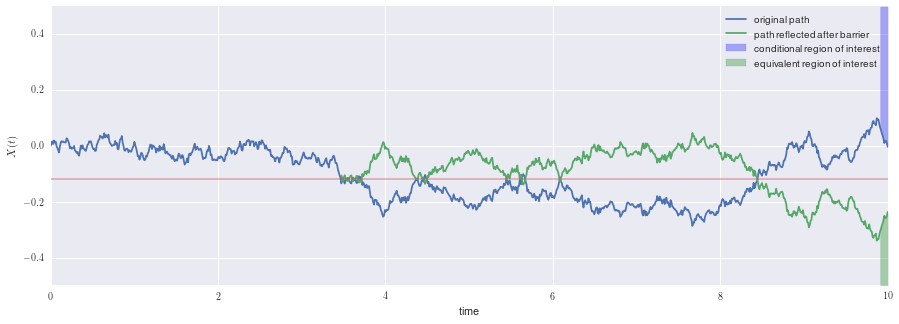

In [72]:
barrier=-Barriers
figsize(15,5)

# first location of crossing barrier
first_crossing=int(np.where(w[0]<barrier,range(1000),2000+np.zeros(1000)).min())
alt_path=w[0].copy()
alt_path[first_crossing:]=barrier-(w[0][first_crossing:]-barrier)

plt.plot(w.get_timeline(),w[0],label="original path")
plt.fill_between(w.get_timeline()[-10:],w[0][-10:],.5,color="b",alpha=.3,label="conditional region of interest")

plt.plot(w.get_timeline()[first_crossing:],alt_path[first_crossing:],label="path reflected after barrier")
plt.fill_between(w.get_timeline()[-10:],alt_path[-10:],-.5,color="g",alpha=.3, label="equivalent region of interest")

plt.plot(w.get_timeline(),barrier*(1+np.zeros_like(w.get_timeline())),alpha=.4)
plt.ylim(-.5,.5)
plt.xlabel("time")
plt.ylabel("$X(t)$")
plt.legend()

We see that for every path that **has** crossed the barrier there is a path that ends on the end point reflect across the barrier. Thus

$$
\begin{eqnarray}
P(X(T) \ge x , m_t^X \le y)&=&P(X(T) \le 2y-x , m_t^X \le y) \\
&=&P(X(T) \le 2y-x)
\end{eqnarray}
$$

If the process is governed by $dX(t) = \sigma dW_t$ the above can further be written as the ** knock in from below ** probabiltiy

$$
P(X(T) \ge x , m_t^X \le y)=P(X(T) \le 2y-x)=\mathcal N(\frac{2y-x}{\sigma \sqrt{t}})
$$

Similarly we have the ** knock in from above ** probabiltiy

$$
P(X(T) \le x , M_t^X \ge y)=P(X(T) \ge 2y-x)=\mathcal N(-\frac{2y-x}{\sigma \sqrt{t}})
$$

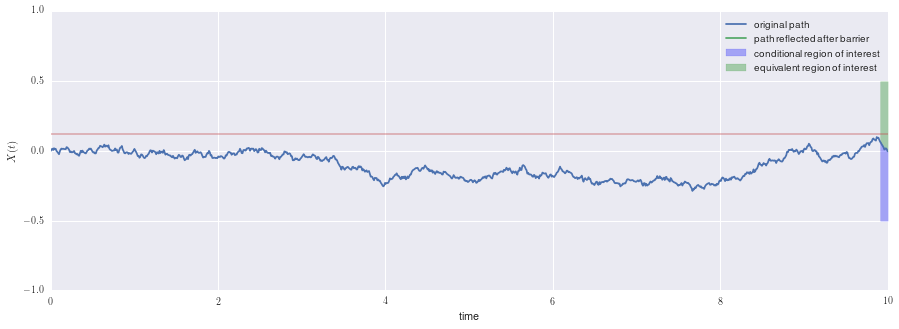

In [73]:

barrier=Barriers

figsize(15,5)

# first location of crossing barrier
first_crossing=int(np.where(w[0]>barrier,range(1000),2000+np.zeros(1000)).min())
alt_path=w[0].copy()
alt_path[first_crossing:]=barrier-(w[0][first_crossing:]-barrier)

plt.plot(w.get_timeline(),w[0],label="original path")
plt.fill_between(w.get_timeline()[-10:],w[0][-10:],-.5,color="b",alpha=.3,label="conditional region of interest")

plt.plot(w.get_timeline()[first_crossing:],alt_path[first_crossing:],label="path reflected after barrier")
plt.fill_between(w.get_timeline()[-10:],alt_path[-10:],.5,color="g",alpha=.3, label="equivalent region of interest")

plt.plot(w.get_timeline(),barrier*(1+np.zeros_like(w.get_timeline())),alpha=.4)
plt.ylim(-1,1)
plt.xlabel("time")
plt.ylabel("$X(t)$")
plt.legend()

We now test the Monte Carlo expression against analytic expressions

In [136]:
T=10.0
sigma=3
x=-2.0
y=-4.0
total_number_paths=10000
w=WeinerPaths(T,1000,total_number_paths,sigma=sigma)

In [137]:
elligible_paths=MonteCarloPaths.mask_data(w[:],w[:].min(1)<y,w[:,-1]>x)

In [138]:
1.0*elligible_paths.shape[0]/total_number_paths

0.2553

In [139]:
stats.norm.cdf((2*y-x)/(sigma*np.sqrt(T))) ## check with analytic formula

0.26354462843276905

In [140]:
elligible_paths=MonteCarloPaths.mask_data(w[:],w[:,-1]< 2* y -x)   # while we are at it, check with the monte carlo of modified expression

In [141]:
1.0*elligible_paths.shape[0]/total_number_paths

0.2611

## Alternate formulation

This is based on the path integral formulation where we fix the end points and the change the path in between. For details see [chapter 3 of Werner Krauth's excellent book](http://www.amazon.com/Statistical-Mechanics-Algorithms-Computations-Physics/dp/0198515367).


The basic idea is the following. Using Bayes theorem we want to find the probability of an intermediate point given the end points.

$$
\begin{eqnarray}
p(y|x_1,x_2) dy \propto p(x_2 | y x_1) p(y|x_1) dy =p(x_2 | y) p(y|x_1) dy 
\end{eqnarray}
$$

which for normally distributed movements becomes

$$
\begin{eqnarray}
p(y|x_1,x_2) dy &\propto& e^{- \frac{(y-x_1)^2}{2 \sigma^2 t_1}- \frac{(y-x_2)^2}{2 \sigma^2 t_2}} 
&\propto& e^{-\frac{(y-\mu)^2}{2 \Sigma^2}}
\end{eqnarray}
$$

where

$$
\begin{eqnarray}
\mu &=& \frac{t_2 x_1 + t_1 x_2}{t_1 + t_2} \\
\Sigma &=& \sigma \left( t_1^{-1} + t_2^{-1} \right)^{-1/2} 
\end{eqnarray}
$$

For the computational implementation we take $dt= T/N$ as the unit of time and then $\Sigma$ has to be multiplied by the usual $\sqrt{{dt}}$ factor.

** (No) Effect of drift term **

Note that if there were a drift term then that would change $x_1 \to x_1 + v t_1$ and $x_2 \to x_2 - v t_2$ because causally $x_2$ is being selected after $y$ even though we are using Bayesian analysis to turn around the sequence of events to fit acausal constraints (or said in more simple terms in hindsight). These two effects end up cancelling.



In [2]:
from MonteCarloPaths import Paths
class LevyWeinerPaths(Paths):
    
    
    def __init__(self,xi,xf,T,nsteps,npaths,mu=0,sigma=1,seed=False):
        super(LevyWeinerPaths,self).__init__(T,npaths)
        
        self.nsteps=nsteps
        self.dt=1.0*self.T/self.nsteps
        Paths.__setup__(self)
        
        self.mu=mu
        self.sigma=sigma
        
        self.dW=np.sqrt(self.dt)

        
        self.paths[:,0]=xi
        self.paths[:,-1]=xf
    
        if type(seed) != bool:
            np.random.seed(seed)
        self.randoms=np.random.normal(0,1,npaths*(nsteps-1))
        self.randoms.shape=[npaths,nsteps-1]

        

        for k in range(1,self.nsteps-1):
            delta_t=1   # because we are always realizing the step right after the previous one in this method
            delta_tp=(self.nsteps-k) # the number of steps remaining to the end
            mu=(delta_tp*self.paths[:,k-1]+delta_t*self.paths[:,-1])/(delta_t+delta_tp)
            Sigma=sigma*(delta_t**(-1) + delta_tp**(-1))**(-1/2.0)
            self.paths[:,k]=mu+ Sigma*self.dW*self.randoms[:,k]

In [3]:
w=LevyWeinerPaths(0,5,10,1000,10,sigma=3)

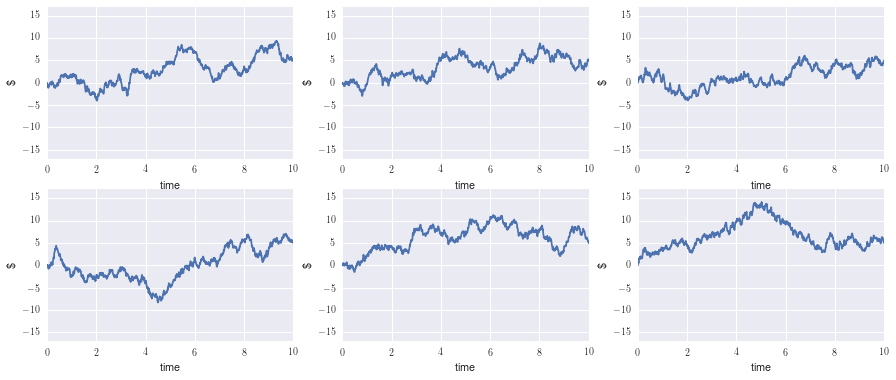

In [4]:
number_columns=3
number_rows=2
figsize(15, 6)

ylim=np.abs([w[:number_columns*number_rows].max(),w[:number_columns*number_rows].min()]).max()*1.2

for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(w.get_timeline(),w[i],"-")
    plt.xlabel("time")
    plt.ylabel("\$")
    plt.ylim(-ylim,ylim)

plt.show()

In [134]:
sigma=3
y=-4.0
x=-2.00
T=10.0

end_points=np.random.normal(0,sigma*np.sqrt(T),1000)
end_points=MonteCarloPaths.mask_data(end_points,end_points>x)

In [121]:
w=np.array([LevyWeinerPaths(0,xf,T,1000,100,sigma=sigma) for xf in end_points])

In [122]:
all_paths=np.vstack([w_i[:] for w_i in w])

In [123]:
elligible_paths=MonteCarloPaths.mask_data(all_paths,all_paths.min(1) < y)

In [124]:
1.0* elligible_paths.shape[0]/all_paths.shape[0]

0.2707178631051753

In [135]:
stats.norm.cdf((2*y-x)/(sigma*np.sqrt(T)))

0.26354462843276905

** THIS IS NOT WORKING ** I AM NOT YET SURE WHY THE PATH INTEGRAL METHOD IS NOT WORKING WHEN WE FIRST FIX THE END POINT.  